<a href="https://colab.research.google.com/github/abhineetraaj/Medical_insaurance_premium_prediction/blob/main/Medical_Insurance_Premium_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data Preprocessing

https://www.kaggle.com/datasets/mirichoi0218/insurance

## Importing the Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/insurance.csv')

## Data Exploration 

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# categorical values
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [7]:
len(dataset.select_dtypes(include='object').columns)

3

In [8]:
# Numerical values
dataset.select_dtypes(include=['int64','float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [9]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

4

In [10]:
# Statical summary
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Group the dataset by sex , smoker, region

In [11]:
dataset.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [12]:
dataset.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [13]:
dataset.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


## Dealing with missing values

In [14]:
dataset.isnull().values.any()

False

In [15]:
dataset.isnull().values.sum()

0

## Encoding the Categorical data

In [16]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [17]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [18]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [19]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
# doing hot encoding for all 3 category
dataset= pd.get_dummies(data=dataset, drop_first=True)

In [22]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


001 -> SouthWest, 
010 -> SouthEast, 
100 -> NorthWest, 
000 -> NorthEast, 

In [23]:
dataset.shape

(1338, 9)

## Correlation Matrix

In [24]:
# here we will drop the target variable
dataset_2 =dataset.drop(columns='charges')

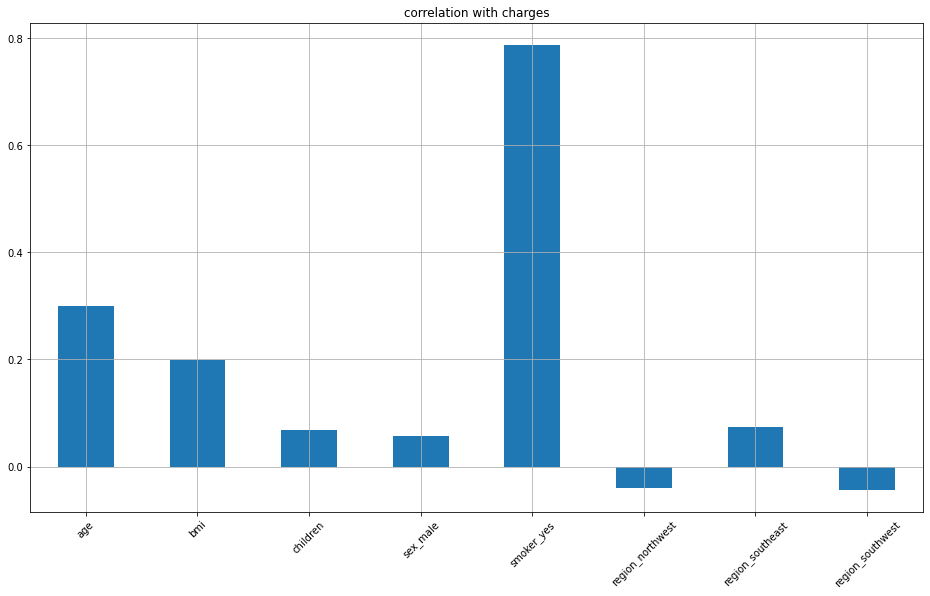

In [26]:
#here we are checking the correlation of independent variable with the dependent variable
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16,9), title='correlation with charges', rot= 45, grid=True
)

smokers is highly correlated with charges

In [27]:
corr= dataset.corr()

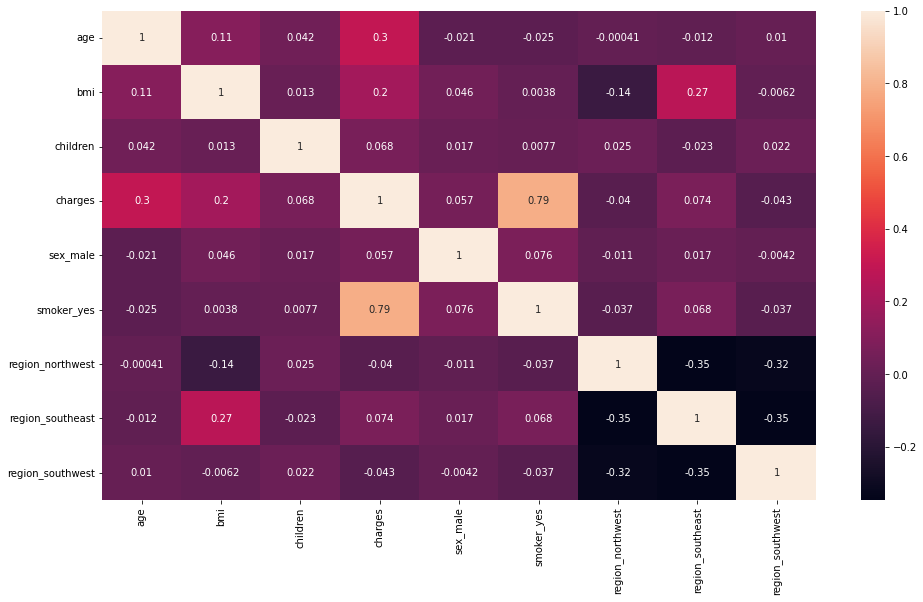

In [28]:
# drawing heatmap for better view
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

## Splitting the dataset

In [29]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [31]:
# matrix of features / indepedent variables
x= dataset.drop(columns='charges')


In [32]:
# target / dependent variables
y = dataset['charges']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [34]:
x_train.shape

(1070, 8)

In [35]:
x_test.shape

(268, 8)

In [36]:
y_train.shape

(1070,)

In [37]:
y_test.shape

(268,)

## Feature Scalling

feature scaling is done beacuse we want all the indepent variable on the same scale

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)

In [39]:
x_train

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [40]:
x_test

array([[ 0.91668389, -0.08539629, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.21962242, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.59081313,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.54472343, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.34581001,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -0.95948331,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

# Part 2: Building the Model

## 1) Multi Linear Regression

In [44]:
# here we will train the ml model
from sklearn.linear_model import LinearRegression
regression_lr = LinearRegression(copy_X=True, fit_intercept = True, normalize  = False, n_jobs  = None) # creating the instance of the class
regression_lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(normalize=False)

In [45]:
# Now we have to do the predictions
y_pred = regression_lr.predict(x_test)

In [46]:
# Now we have analise the performance of Multi linear regression so ll use r-squared or coefficient of determination
from sklearn.metrics import r2_score

In [47]:
r2_score(y_test, y_pred)

0.7999876970680434

## 2) Random Forest Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor
regression_rf= RandomForestRegressor()
regression_rf.fit(x_train, y_train)

RandomForestRegressor()

In [49]:
y_pred=regression_rf.predict(x_test)

In [50]:
r2_score(y_test, y_pred)

0.8817930960164884

## 3) XGBoost regression

In [51]:
from xgboost import XGBRFRegressor
regression_xgb= XGBRFRegressor()
regression_xgb.fit(x_train, y_train)

[07:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor()

In [52]:
y_pred=regression_xgb.predict(x_test)

In [53]:
r2_score(y_test, y_pred)

0.882613022028781

# Part 3: predict charges for new customer

In [54]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Example 1:

In [57]:
frank_obs = [[40, 45.5, 4, 0, 0, 0, 0, 0]]

In [58]:
regression_xgb.predict(sc.transform(frank_obs))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([6828.815], dtype=float32)

### Example 2:

In [59]:
sara_obs = [[19, 29.9, 0, 0, 0, 1, 0, 0]]

In [60]:
regression_xgb.predict(sc.transform(sara_obs))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([4235.875], dtype=float32)